<a href="https://colab.research.google.com/github/lukilearn/CAPTONE_4_Netflix_Movies_And_Tv_Shows_Clustering_Unsupervised_ML/blob/main/Netflix_Movies_And_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies And TV Shows Clustering**

---------------------------------------------

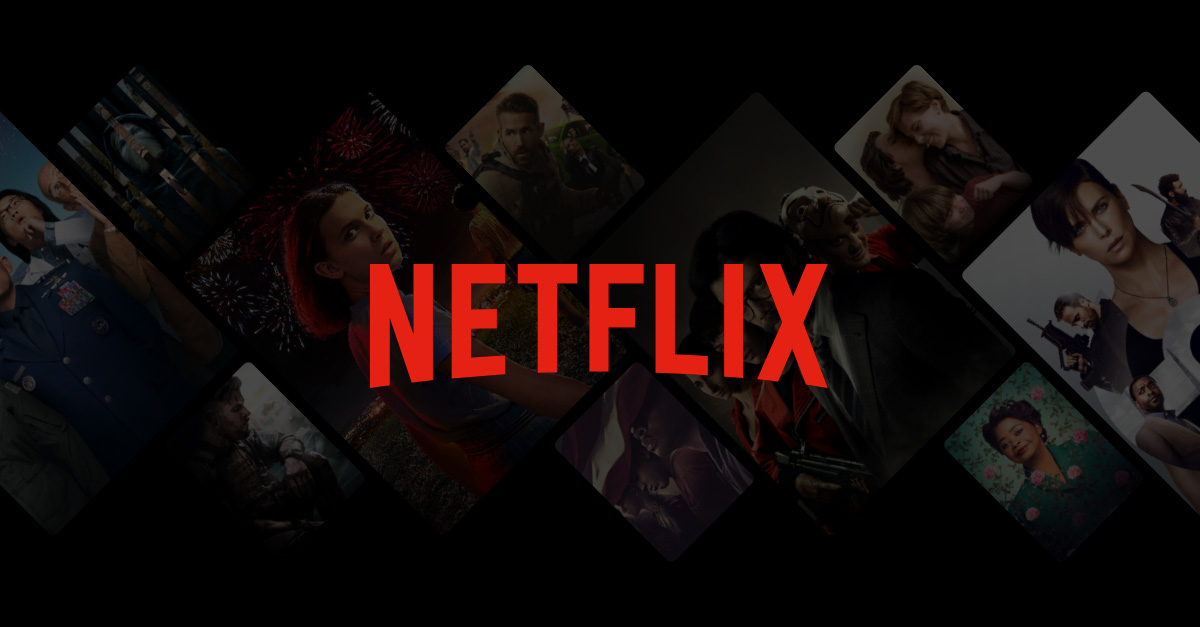

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **NAME**              - G MOHAMED LUQMAN

# **Project Summary -**

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies on an internet-connected device. Depending on your plan, you can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.


Netflix Movies and TV Shows Clustering is a data analysis and machine learning technique that Netflix uses to group their content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast and plot, and using algorithms to identify patterns and similarities. In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, which will lead to increased retention and company revenue.

Netflix Movies and TV Shows Clustering is a data-driven approach that Netflix uses to group its vast library of content into similar categories. The process involves collecting and analyzing various data points such as genre, cast, director, plot and other relevant features. Netflix will then use unsupervised machine learning algorithms to identify patterns and similarities between different titles.

Algorithms used in this process include clustering techniques such as k-means, hierarchical clustering, and principal component analysis (PCA). These algorithms help Netflix group movies and TV shows with similar features into distinct groups, each representing a unique genre or category.

The ultimate goal of this clustering is to improve the user experience on Netflix by providing personalized content recommendations to users based on their viewing history and preferences. By organizing the content library into clusters, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will stay engaged with the platform.

In addition to improving user satisfaction, clustering also helps Netflix make data-driven decisions about content production and licensing. By understanding underlying trends and patterns in user behavior, Netflix can make informed decisions about which titles to produce or acquire and which to remove from its platform. This ultimately helps increase customer retention and company revenue.

In this project we have done-:

* Understanding the dataset and problem statement.
* Data Wrangling.
* Handling null vaulues and Data Cleaning.
* Text Preprocessing.
* Text Vectorization using TF-TDF.
* Clustering Analysis using different clustering algorithms.
* Checking out distribution of different cluster with the help of word cloud.
* Building a recommender system using cosine similarity.
Conclusion

# **GitHub Link 👇🏻**

https://github.com/lukilearn/CAPTONE_4_Netflix_Movies_And_Tv_Shows_Clustering_Unsupervised_ML

# **Problem Statement👇🏻**



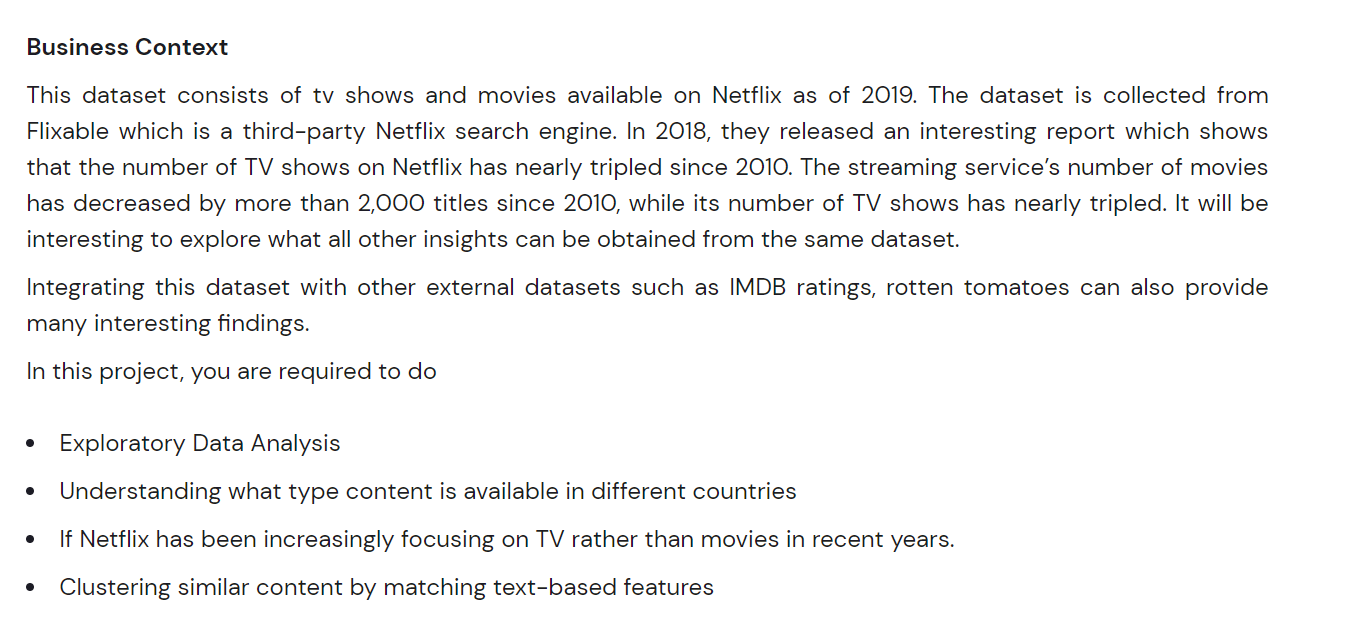

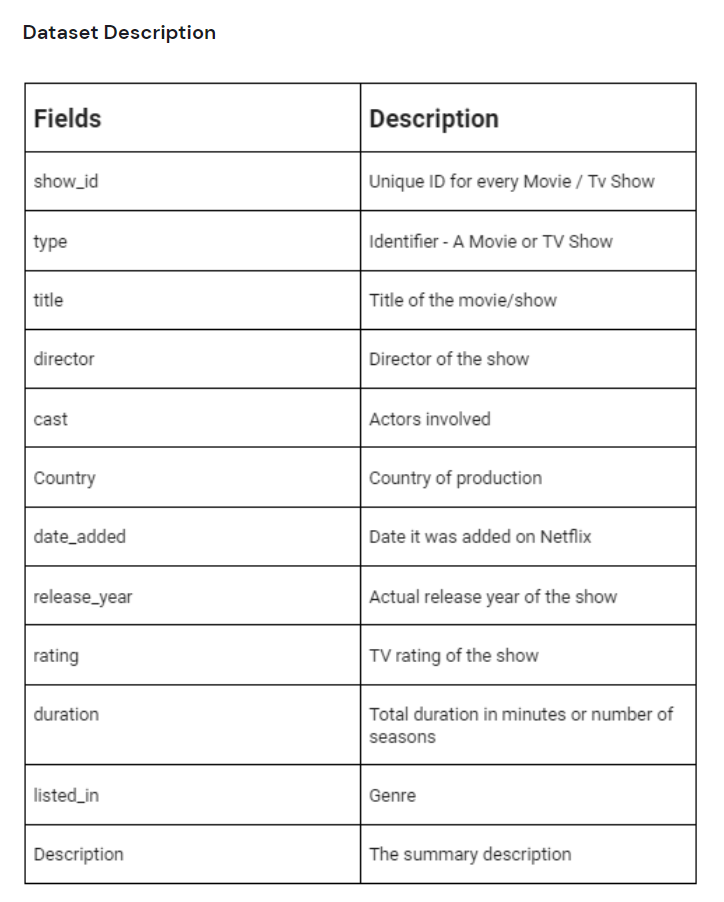

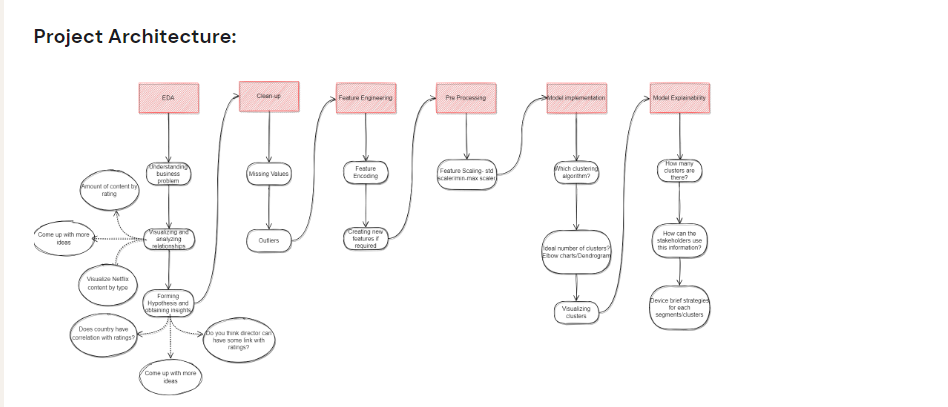

### Importing Necessary Libraries👇🏻

In [1]:

# Necessary Libraries
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the given dataset👇🏻

In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Almabetter_Capstone_Project/Netflix_Movies_And_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',)

### Dataset First View👇🏻

In [4]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count👇🏻

In [9]:

# Dataset Rows & Columns count

# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  7787
Number of columns are:  12


### Dataset Information👇🏻

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB



Duplicate Values, Missing Values/Null Values, Unique value


In [10]:


# Dataset Duplicate Value Count
# This user define function will give the type,count of null and non null values as well as null ratio

def df_info():
  temp=pd.DataFrame(index=data.columns)
  temp["datatype"]=data.dtypes
  temp["not null values"]=data.count()
  temp["null value"]=data.isnull().sum()
  temp["% of null value"]=data.isnull().mean()*100
  temp["unique count"]=data.nunique() # Return Series with number of distinct elements. Can ignore NaN values.
  return temp
df_info()



,datatype,not null values,null value,% of null value,unique count
show_id,object,7787,0,0.000000,7787
type,object,7787,0,0.000000,2
title,object,7787,0,0.000000,7787
director,object,5398,2389,30.679337,4049
cast,object,7069,718,9.220496,6831
country,object,7280,507,6.510851,681
date_added,object,7777,10,0.128419,1565
release_year,int64,7787,0,0.000000,73
rating,object,7780,7,0.089893,14
duration,object,7787,0,0.000000,216



Missing Values/Null Values


In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

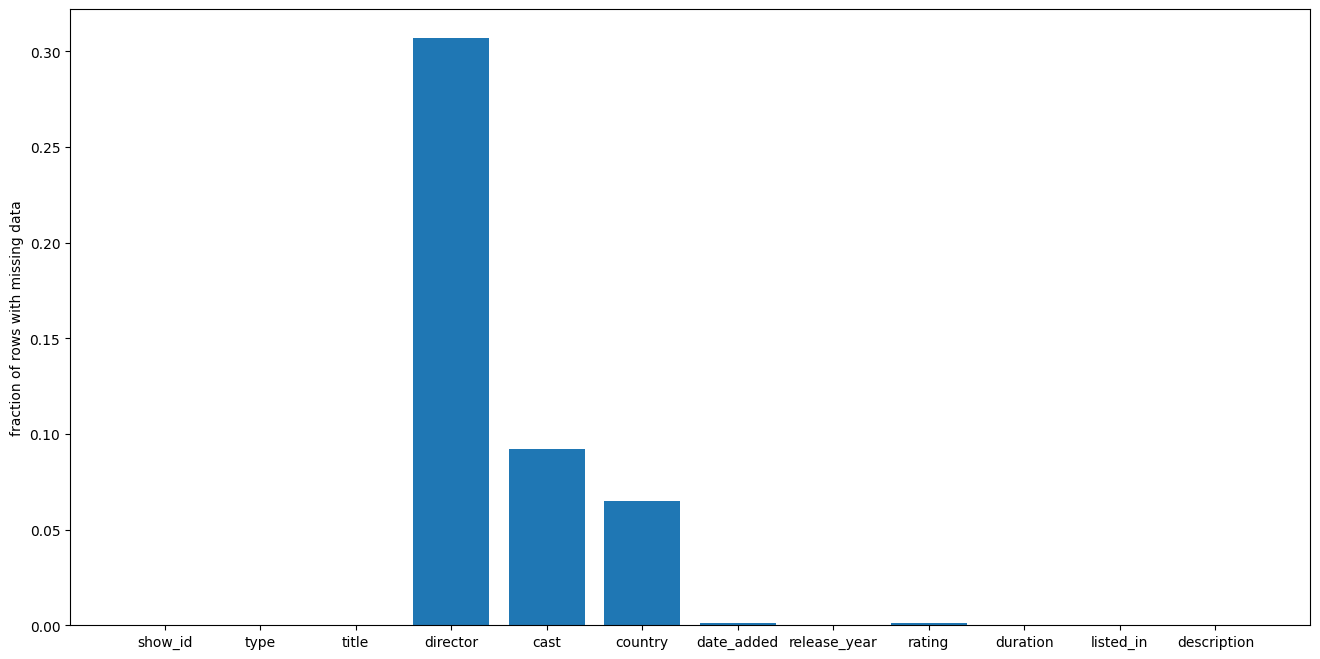

In [12]:
# null value distribution
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<Axes: >

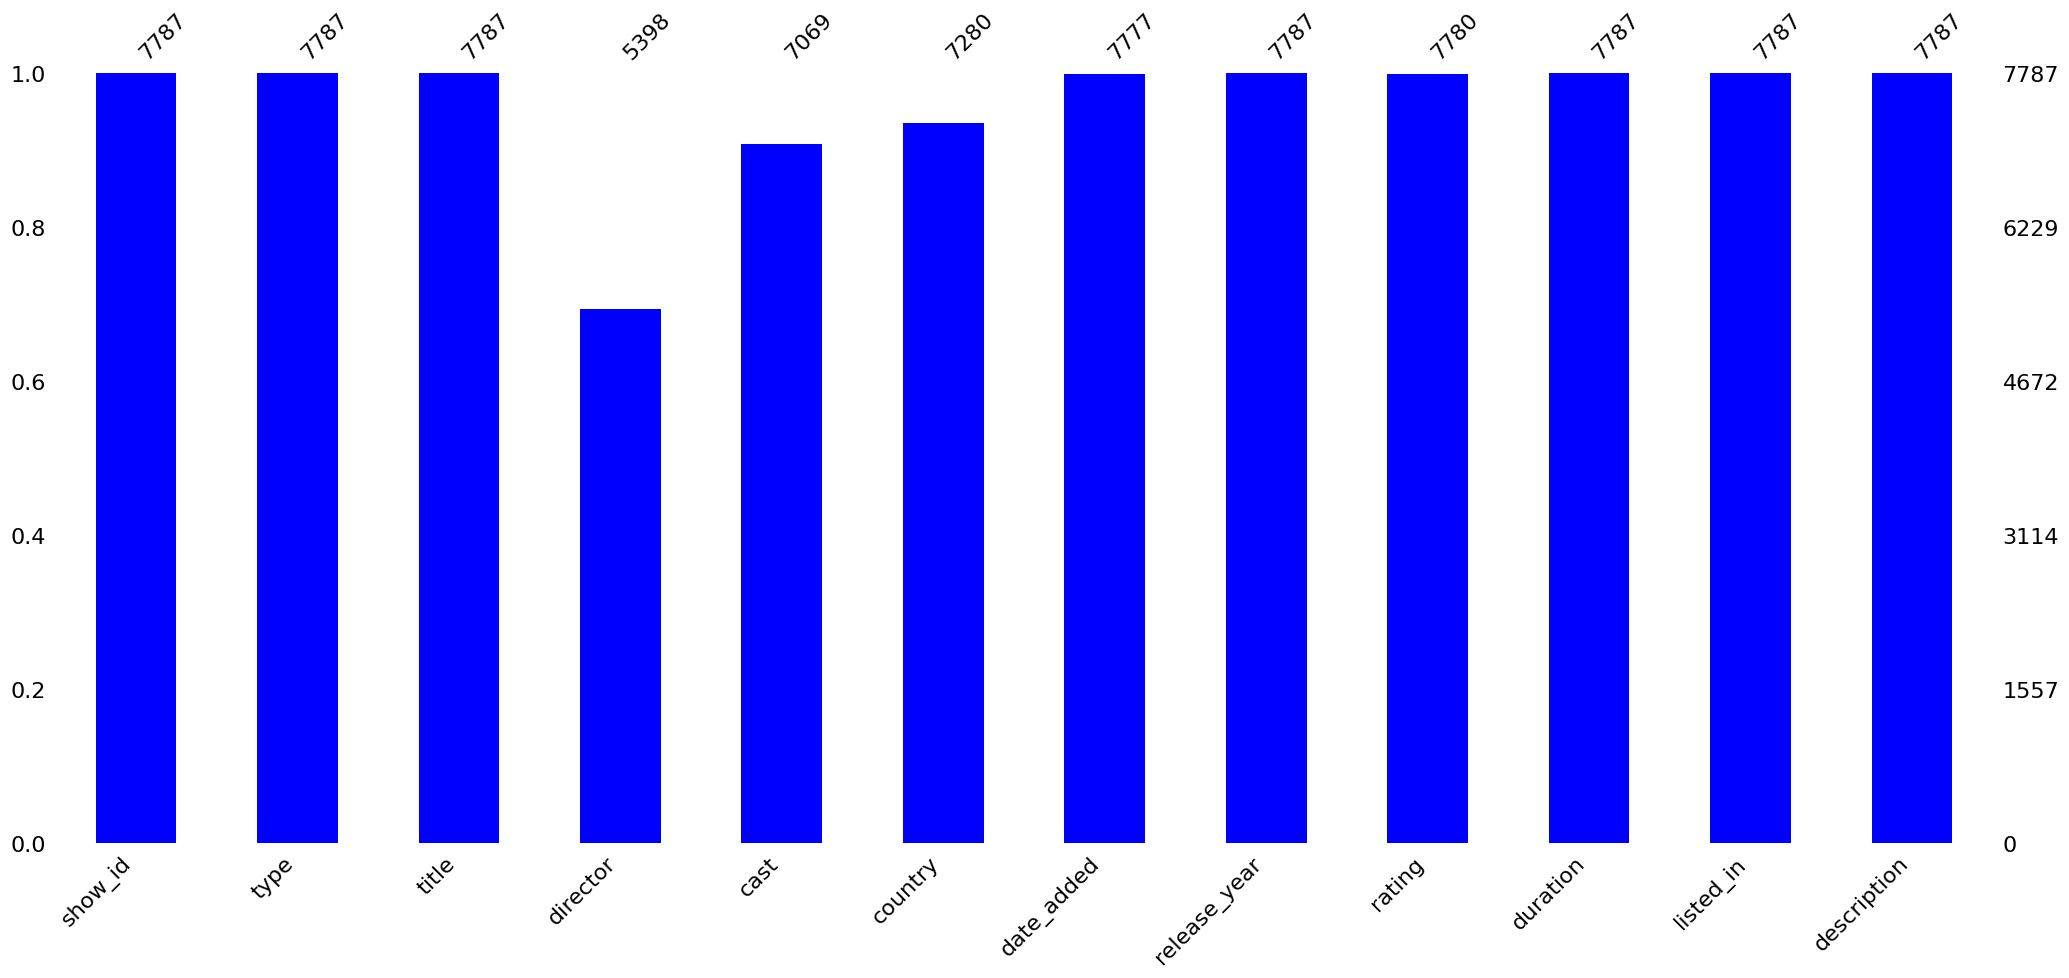

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(data, color = 'blue')

### What did you know about your dataset?

As we can check most of the columns are not having any missing of null value except
- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7)

##  ***Understanding Our Variables👇🏻***

In [14]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:



#Looking for the description of the dataset to get insights of the data
data.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 👇🏻

Only one column Release_Date is numerical type, rest all are strings. So, Describe is not very useful in this case.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for i in data.columns:
  print(f'number of unique values in {i} column : {data[i].nunique()}    \nunique values :\n{data[i].unique()}')
  print('='*150)

number of unique values in show_id column : 7787    
unique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
number of unique values in title column : 7787    
unique values :
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique values in director column : 4049    
unique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique values in cast column : 6831    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sa